In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")


# REPLACING BLANKS WITH 0 AS TENURE IS 0 AND NO TOTAL CHARGES ARE RECORDED

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.isnull().sum().sum()

np.int64(0)

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
df["customerID"].duplicated().sum()

np.int64(0)

In [20]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['seniorCitizen'] = df["SeniorCitizen"].apply(conv)

# convert 0 and 1 values of senior citizen to yes/no to make it easier to understand 

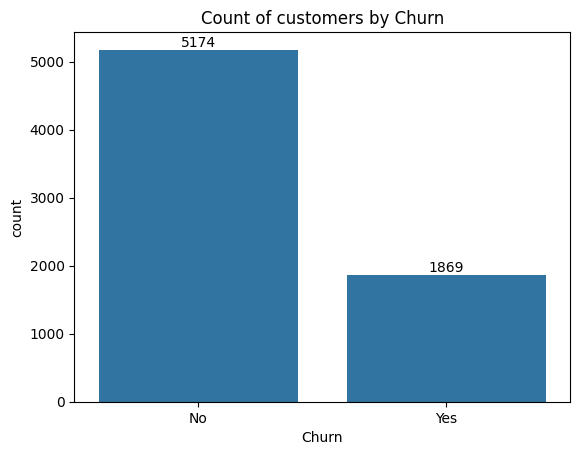

In [34]:
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

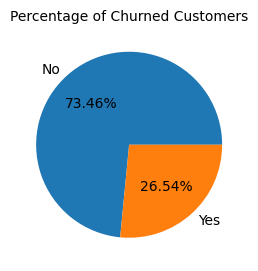

In [40]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize = 10) 
plt.show()


#From the given pie chart we can conclude that 26.54% of our customers have churned out. 
#Now let's explore the reson behind it

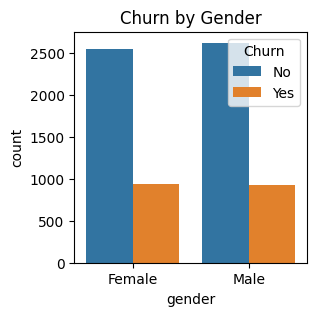

In [12]:

plt.figure(figsize = (3,3))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

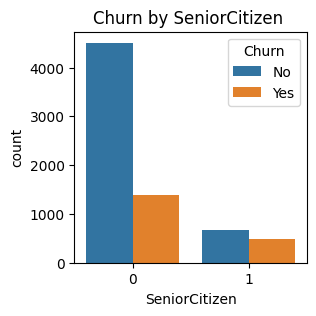

In [13]:
plt.figure(figsize = (3,3))
sns.countplot(x ="SeniorCitizen", data=df, hue="Churn")
plt.title("Churn by SeniorCitizen ")
plt.show()

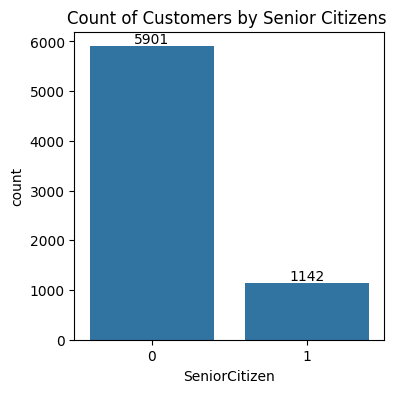

In [23]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x ="SeniorCitizen", data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizens ")
plt.show()

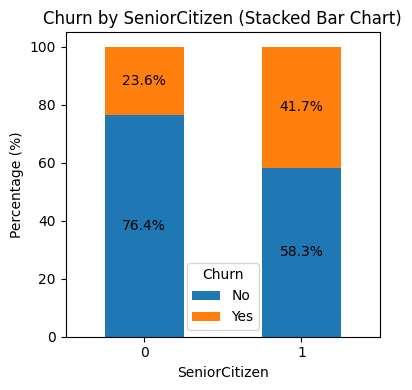

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame containing 'SeniorCitizen' and 'Churn'

# Step 1: Calculate the count of each combination of 'SeniorCitizen' and 'Churn'
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)

# Step 2: Normalize the data to get percentages (percentage of the total per 'SeniorCitizen' category)
count_data_percentage = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Step 3: Plot the stacked bar chart with specific colors (blue and orange)
colors = ['#1f77b4', '#ff7f0e']  # Blue and Orange color codes

ax = count_data_percentage.plot(kind='bar', stacked=True, figsize=(4, 4), color=colors)

# Step 4: Add percentage labels to each bar segment
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        # Get the percentage label for each bar
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', 
                    fontsize=10, color='black')

# Step 5: Add labels and title
plt.title("Churn by SeniorCitizen (Stacked Bar Chart)", fontsize=12)
plt.xlabel('SeniorCitizen', fontsize=10)
plt.ylabel('Percentage (%)', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


#comparative a greater percentage of people in senior citizen category have churned

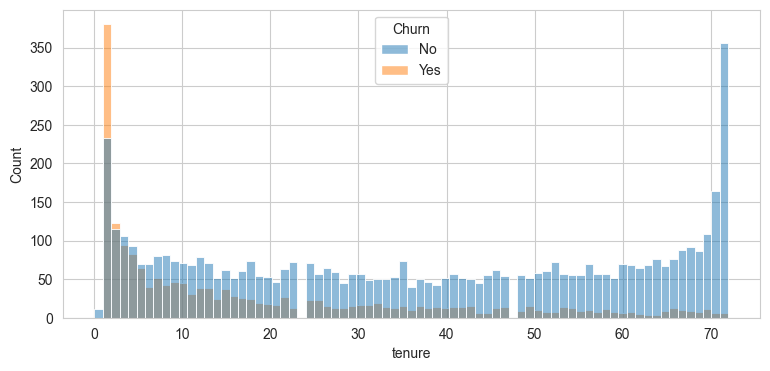

In [56]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 75, hue = "Churn")
plt.show()

#people who have used our services for a long time have stayed and people who have used out services #1 or 2 months have churned

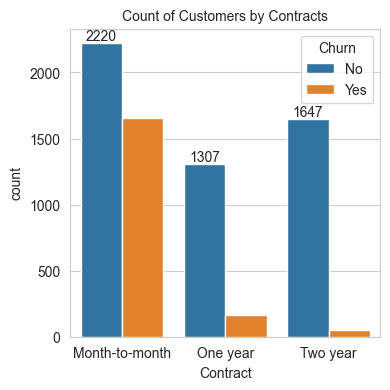

In [66]:
plt.figure(figsize = (4,4))
ax =sns.countplot(x='Contract', data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contracts",fontsize = 10)
plt.show()

#people who have month to month contract are Likely to churn then from those who have 1 or 2 year contracts

In [58]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'seniorCitizen'], dtype=object)

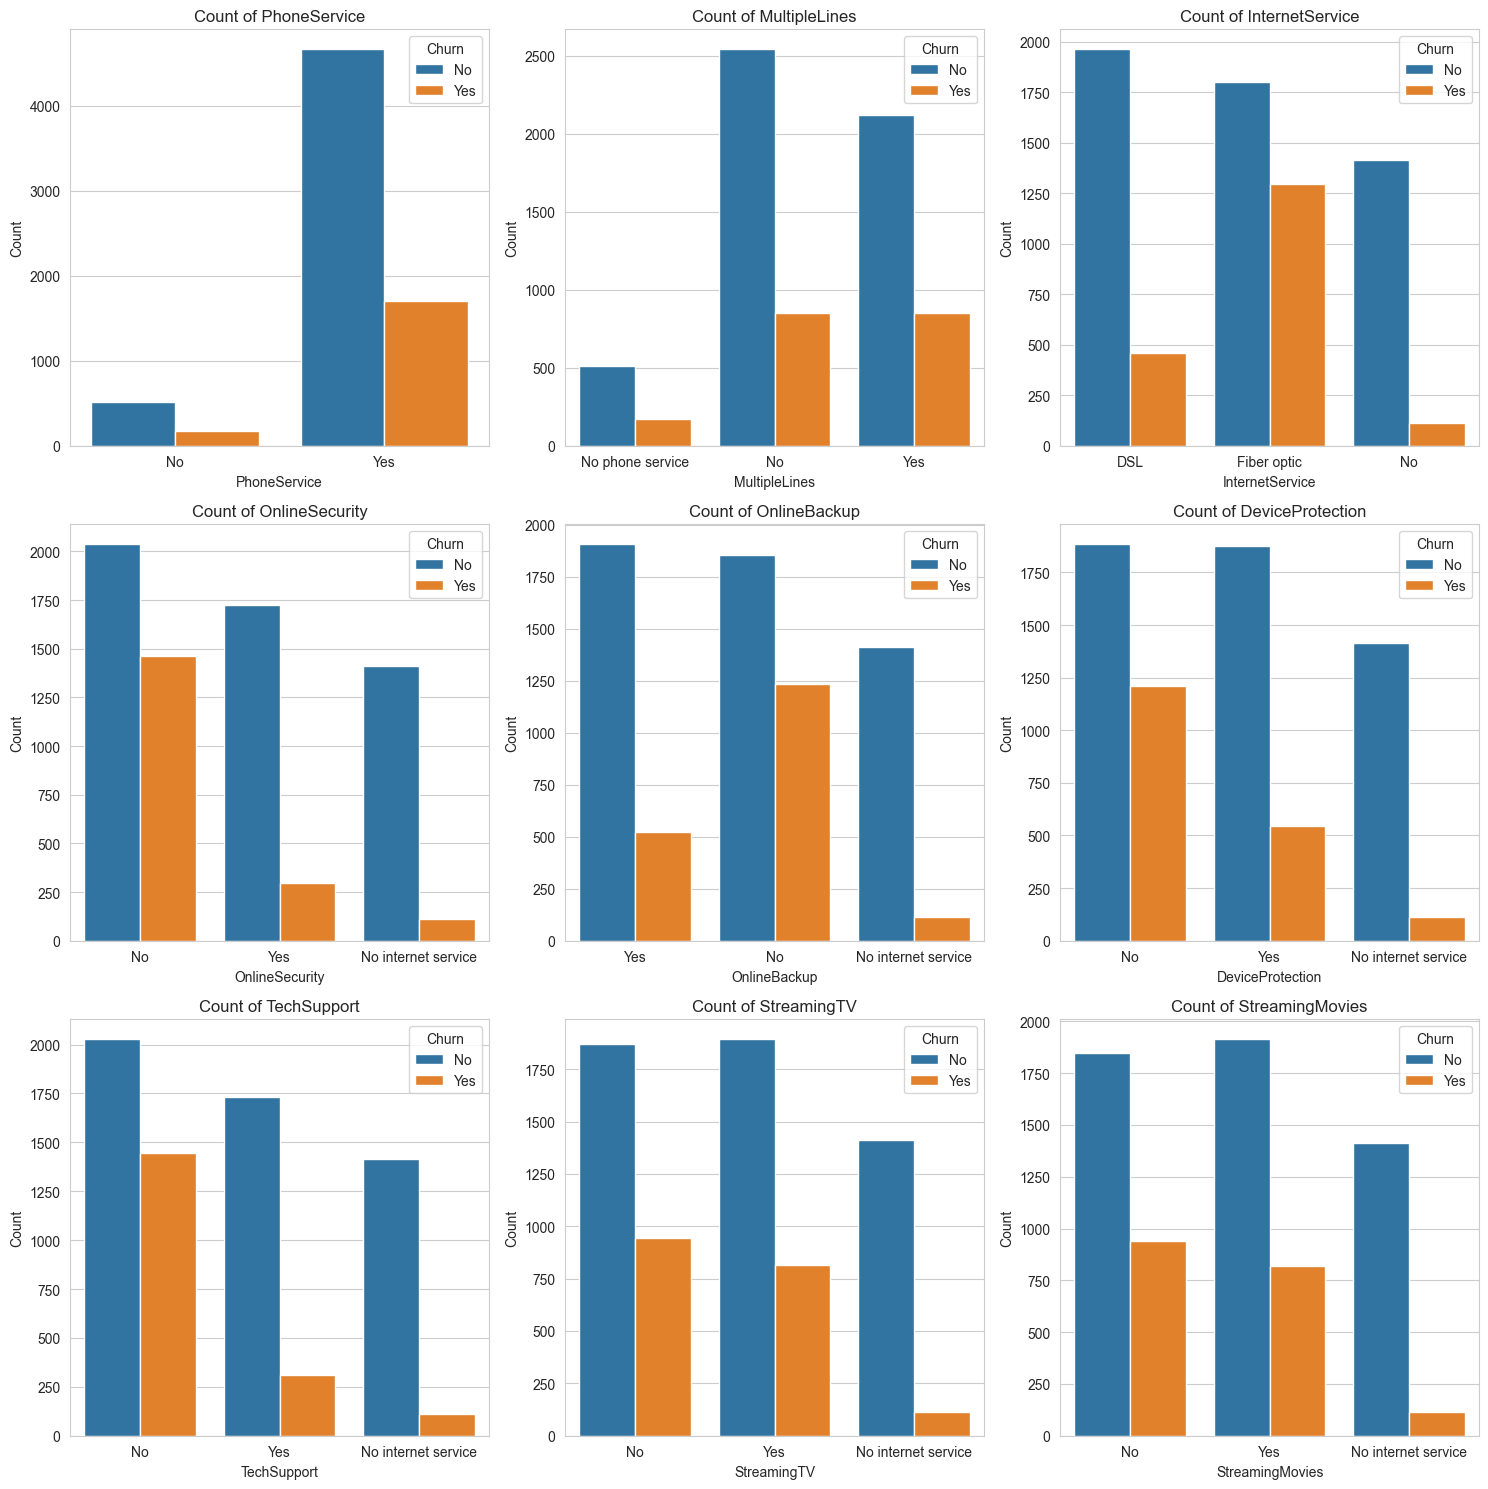

In [59]:

# List of columns to plot
columns_to_plot = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the subplot grid
num_columns = len(columns_to_plot)
fig, axes = plt.subplots(nrows=(num_columns + 2) // 3, ncols=3, figsize=(15, 5 * ((num_columns + 2) // 3)))
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate

# Create countplots for each column
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=df, ax=axes[i], hue='Churn')  # Add hue if needed
    axes[i].set_title(f"Count of {column}", fontsize=12)
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(column)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


# The majority of customers who do not churn tend to have service like phoneService, InternetService(particularly DSL), and OnlineSecurity enabled.For services like
# Onlinebackup, techSupport and StreamingTV, churn rates are noticeable higher when these serevices are not used or are unavaaible.

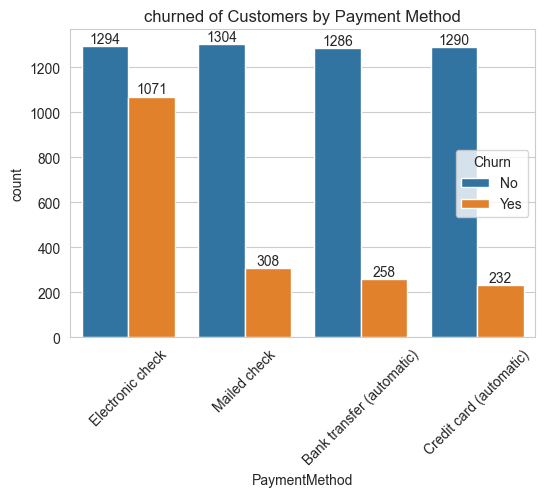

In [65]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x='PaymentMethod', data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("churned of Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

# customer is liklely  to chur when he is using elctronic check as a payment method